Saving research.csv to research (1).csv
First 5 rows:
                    Variable       Breakdown  \
0  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
1  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
2  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
3  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
4  _01_Total_RD_Expenditure  ANZSIC_1_Digit   

                    Breakdown_category  Year RD_Value Status  \
0  A_Agriculture, Forestry and Fishing  2016       91    NaN   
1  A_Agriculture, Forestry and Fishing  2018       89    NaN   
2  A_Agriculture, Forestry and Fishing  2019      ...    NaN   
3  A_Agriculture, Forestry and Fishing  2020       99    NaN   
4  A_Agriculture, Forestry and Fishing  2021      ...    NaN   

                    Unit Footnotes Relative_Sampling_Error  
0  NZ Dollars (millions)        12                    23.8  
1  NZ Dollars (millions)        12                    51.7  
2  NZ Dollars (millions)        12                     ...  
3  NZ Dollars (millions)        1

/tmp/ipython-input-2-1469669020.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


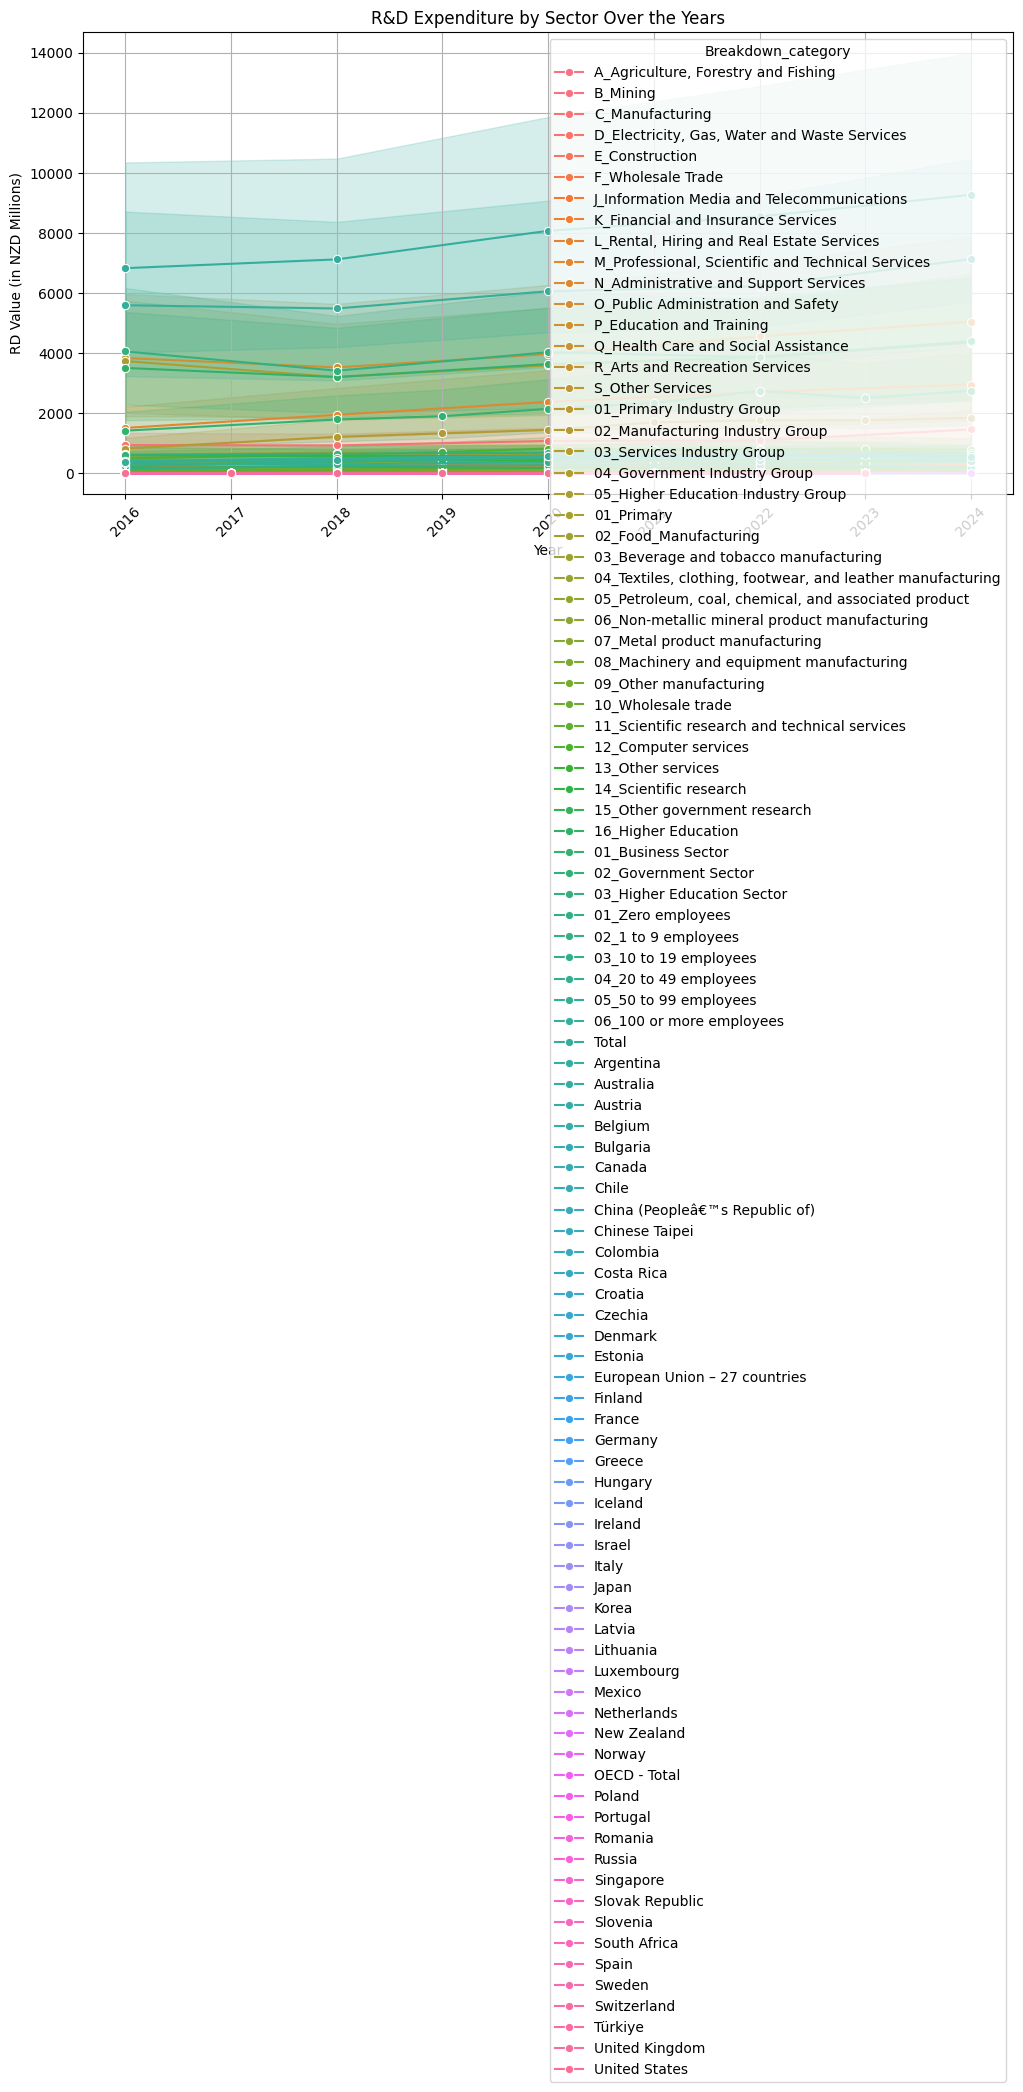

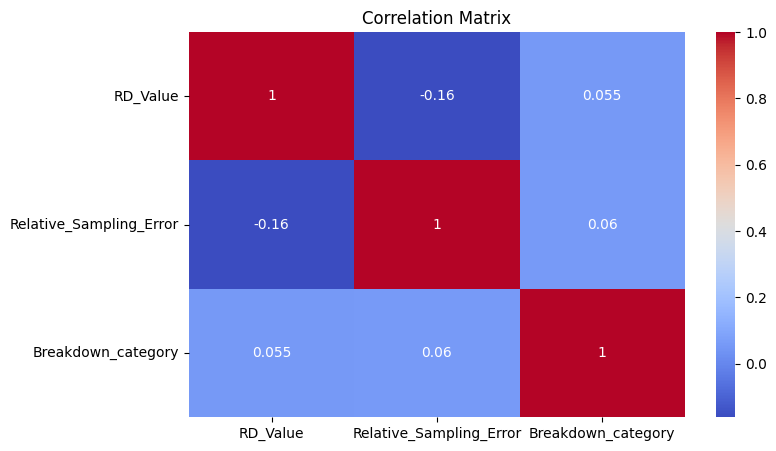

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("research.csv")

print("First 5 rows:\n", df.head())
print("\nDataset Info:")
df.info()
print("\nSummary statistics:")
print(df.describe(include='all'))
print("\nMissing values:\n", df.isnull().sum())

df['RD_Value'] = pd.to_numeric(df['RD_Value'], errors='coerce')
df['Relative_Sampling_Error'] = pd.to_numeric(df['Relative_Sampling_Error'], errors='coerce')

df = df.dropna(subset=['RD_Value'])

df.loc[:, 'Relative_Sampling_Error'] = df['Relative_Sampling_Error'].fillna(df['Relative_Sampling_Error'].median())

columns_to_drop = ['Status', 'Footnotes']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print("\nNulls after cleaning:\n", df.isnull().sum())

df_encoded = df.copy()
df_encoded['Breakdown_category'] = df_encoded['Breakdown_category'].astype('category').cat.codes

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='RD_Value', hue='Breakdown_category', marker="o")
plt.title("R&D Expenditure by Sector Over the Years")
plt.xlabel("Year")
plt.ylabel("RD Value (in NZD Millions)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

df_corr = df_encoded[['RD_Value', 'Relative_Sampling_Error', 'Breakdown_category']]
plt.figure(figsize=(8, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
